# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




---
## **Acceso a los diferentes dataset y visualizacion**

#Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). en algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|---|    ---   |         ---         |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da) |

#                      GRUPO X20

# Llanes Carlos Martin   DNI: 14782340  EMAIL carelife8@gmail.com   
# Jose ignacio Caraballo  DNI: 30351231 EMAIL nacho27583@hotmail.com
# Luján, David Alberto    DNI:31633877 EMAIL dal340@hotmail.com
# Leonel Ejarque          DNI 30368892 EMAIL leonelejarque14@gmail.com
# Martinez, Bruno Maximiliano DNI: 38029411 EMAIL martinezbruno13194@gmail.com
# Agresti Yanina DNI 33.694996 EMAIL yaninakaleb@gmail.com
# Martin Bahl DNI 44208195 EMAIL bahlmartinexactas@gmail.com
# Mercado Pamela Denisse DNI: 39272061 Email: pamelamercado23@hotmail.com
# Agustín Salum DNI: 36764860 EMAIL: agustinsalum92@hotmail.com


#Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción


El Dataset elegido es debido al conjunto de datos sobre el consumo de los argentinos a lo largo de 7 años en supermercados, la idea era ver si debido a la inflación creciente, podría haber una relación no lineal y difícil de predecir, ya que supuestamente al aumentar la inflación, los precios se disparan y el sueldo no acompaña, por ende el gasto con tarjeta de crédito debería ser
de un incremento mayor ,ya que se compra endeudándose y debería ser al principio una relación lineal de las variables elegidas(ventas totales, pago con tarjeta de créditos) y al pasar los años se debería generar una curva , que se inclina hacia la "y" , pero eso no se pudo apreciar


_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [2]:
# Importo librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler





In [3]:
# Creo un archivo data frame con un archivo (csv)
data = pd.read_csv("content/ventas-supermercados-2.csv")
df=pd.DataFrame(data)

##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).

In [4]:
# info de las columnas y sus etiquetas y los primeros 5 registros
df.head(5)



,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,2017-01-01,27858.872083,27477.307666,2.785887e+07,2.759173e+07,267141.956,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,340777.38815,4.397544e+06,772371.84765,1.838507e+06,2.806660e+06
1,2017-02-01,25994.200168,25223.428860,2.599420e+07,2.574918e+07,245020.769,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,328288.69508,4.053284e+06,672290.51653,1.257662e+06,2.354085e+06
2,2017-03-01,27780.006522,26334.263640,2.778001e+07,2.747223e+07,307777.804,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,353335.15476,4.354198e+06,667696.66531,1.305675e+06,2.266189e+06
3,2017-04-01,29134.272221,27045.884463,2.913427e+07,2.882748e+07,306792.733,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,359694.45374,4.355707e+06,838948.24575,1.535726e+06,2.146756e+06
4,2017-05-01,27969.004677,25631.863992,2.796900e+07,2.756931e+07,399693.262,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,336568.00849,4.206102e+06,915895.14981,1.824462e+06,2.117971e+06


In [5]:
# informacion detallada de las etiquetas de columnas y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        79 non-null     object 
 1   ventas_precios_corrientes            79 non-null     float64
 2   ventas_precios_constantes            79 non-null     float64
 3   ventas_totales_canal_venta           79 non-null     float64
 4   salon_ventas                         79 non-null     float64
 5   canales_on_line                      79 non-null     float64
 6   ventas_totales_medio_pago            79 non-null     float64
 7   efectivo                             79 non-null     float64
 8   tarjetas_debito                      79 non-null     float64
 9   tarjetas_credito                     79 non-null     float64
 10  otros_medios                         79 non-null     float64
 11  ventas_totales_grupo_articulos    

In [6]:
# Obtengo estadísticas descriptivas de las columnas numéricas
df.describe()

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
count,79.000000,79.000000,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,...,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01
mean,117708.347840,25303.036996,1.177083e+08,1.141283e+08,3.580032e+06,1.177083e+08,3.517770e+07,3.407927e+07,4.283998e+07,5.611402e+06,...,3.178900e+07,4.163431e+06,1.276399e+07,1.318956e+07,4.565877e+06,1.143562e+06,1.591897e+07,2.858263e+06,7.783644e+06,8.880921e+06
std,108086.552977,2315.769167,1.080866e+08,1.045110e+08,3.709835e+06,1.080866e+08,2.833693e+07,3.436626e+07,3.994088e+07,5.807229e+06,...,2.954107e+07,3.943760e+06,1.141700e+07,1.217894e+07,4.738686e+06,1.117433e+06,1.386442e+07,2.595997e+06,7.479532e+06,7.671972e+06
min,25994.200168,21628.031777,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1.044014e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,9.522033e+05,3.282887e+05,4.053284e+06,6.676967e+05,1.257662e+06,2.117971e+06
25%,40345.935551,23797.284769,4.034594e+07,3.981664e+07,6.585813e+05,4.034594e+07,1.418464e+07,1.055719e+07,1.433673e+07,1.684274e+06,...,1.106834e+07,1.522828e+06,4.513890e+06,4.107861e+06,1.379038e+06,4.542709e+05,5.822339e+06,1.059855e+06,2.349542e+06,3.399130e+06
50%,78232.859602,24652.714424,7.823286e+07,7.455485e+07,3.046181e+06,7.823286e+07,2.486842e+07,2.066085e+07,2.933259e+07,3.336034e+06,...,2.261402e+07,2.630488e+06,9.349357e+06,8.463266e+06,2.778663e+06,6.205796e+05,1.108969e+07,1.826747e+06,4.776635e+06,5.935994e+06
75%,146952.267024,26384.819795,1.469523e+08,1.422036e+08,4.782376e+06,1.469523e+08,4.502694e+07,4.260439e+07,5.222907e+07,7.284183e+06,...,3.733364e+07,4.816897e+06,1.579264e+07,1.687895e+07,5.366549e+06,1.298572e+06,1.948480e+07,3.829073e+06,1.049150e+07,1.170575e+07
max,482669.389051,34084.519434,4.826694e+08,4.673881e+08,1.528130e+07,4.826694e+08,1.202149e+08,1.552504e+08,1.762556e+08,3.094848e+07,...,1.358757e+08,1.814619e+07,5.269467e+07,5.062092e+07,1.958770e+07,4.951871e+06,6.152573e+07,1.403827e+07,3.327556e+07,3.315275e+07


##3- Aplicar PROCESO DE LIMPIEZA

In [7]:
# Obtengo el número de valores faltantes en cada columna

df.isnull().sum() #las varibles edad tiene datos nulos


indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

**No se indican valores nulos en el df**

In [8]:
# Elimino las columnas irrelevantes o poco útiles para nuestro análisis

df.drop(['indice_tiempo', 'ventas_precios_corrientes','bebidas','verduleria_fruteria'], axis=1, inplace=True)
df.drop(['ventas_precios_constantes', 'ventas_totales_canal_venta','articulos_limpieza_perfumeria'], axis=1, inplace=True)
df.drop(['salon_ventas', 'canales_on_line', 'tarjetas_debito','lacteos','otros','almacen'], axis=1, inplace=True)
df.drop(['ventas_totales_grupo_articulos', 'efectivo', 'otros_medios','panaderia'], axis=1, inplace=True)
df.drop(['indumentaria_calzado_textiles_hogar', 'subtotal_ventas_alimentos_bebidas'], axis=1, inplace=True)
df.drop(['alimentos_preparados_rotiseria', 'electronicos_articulos_hogar','carnes'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ventas_totales_medio_pago  79 non-null     float64
 1   tarjetas_credito           79 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [11]:
# Calculamos la mediana de cada columna y
# agregue ese valor para que sean 80 registros

mediana1 = df.median()
#mediana2 = df.median()
print(mediana1)
df =df.append(mediana1, ignore_index=True)

ventas_totales_medio_pago    7.823286e+07
tarjetas_credito             2.933259e+07
dtype: float64


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
# Muestro como queda

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ventas_totales_medio_pago  80 non-null     float64
 1   tarjetas_credito           80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


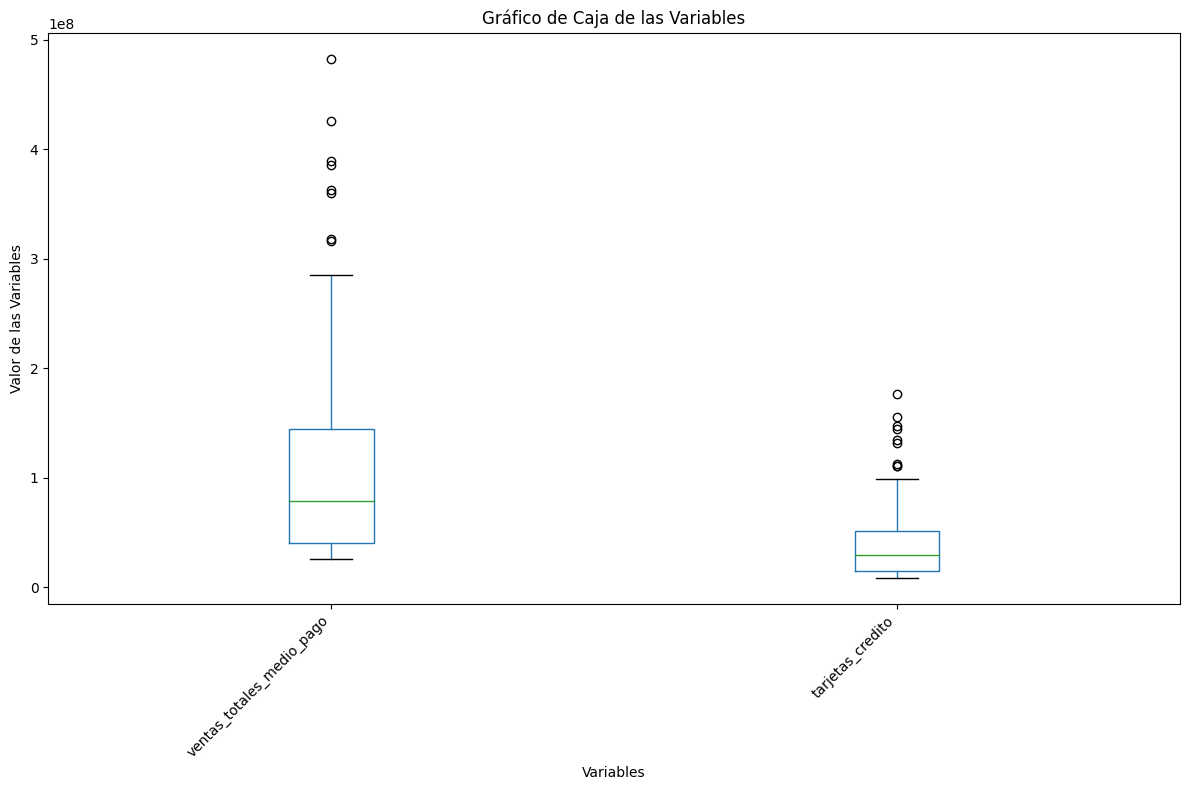

In [ ]:
# Detecto valores atípicos usando diagramas de caja

# Creamos el gráfico de caja con las etiquetas ajustadas
plt.figure(figsize=(12, 8))
boxplot = df.boxplot(grid=False)
plt.title("Gráfico de Caja de las Variables")
plt.ylabel("Valor de las Variables")
plt.xlabel("Variables")

# Ajustamos el ángulo de las etiquetas en el eje X
plt.xticks(rotation=45, ha="right")  # Ángulo de 45 grados y alineación a la derecha
plt.tight_layout()
plt.show()

##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold


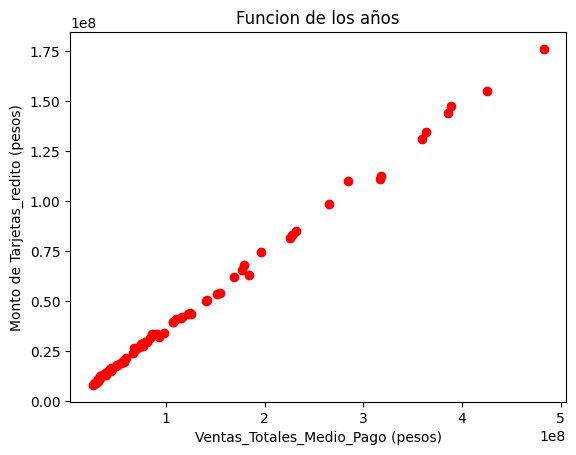

In [ ]:
# Grafico la relacion entre los datos reales

X = df['ventas_totales_medio_pago']
y = df['tarjetas_credito']
# Columnas a graficar

plt.scatter(X, y, color='red')
plt.xlabel('Ventas_Totales_Medio_Pago (pesos)')  # Etiqueta del eje X
plt.ylabel('Monto de Tarjetas_redito (pesos)')  # Etiqueta del eje Y
plt.title("Funcion de los años")
plt.show()

**Esto me dice que puedo aplicar una regresión Lineal**

In [ ]:
# Calculo la correlación

correlacion = np.corrcoef(X.ravel(), y.ravel())[0, 1]
print(correlacion)

0.9991734047666138


**Correlación alta : Indica que puedo usar regresión Lineal**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ==============================================================================
# Defino los datos a estudiar

X = df['ventas_totales_medio_pago'].values.reshape(-1,1)
y = df['tarjetas_credito'].values.reshape(-1,1)

# ==============================================================================
#Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Valores que no se estandarizan para calcular las metricas, para saber su
# Verdadero impacto en millones de pesos

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==============================================================================
# estandarizo

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print(X_train , X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# ==============================================================================
# Creo un objeto de modelo de regresión lineal

modelo = LinearRegression()

# Creo Modelo1 no estandarizado

modelo1 = LinearRegression()
# ==============================================================================
# Entrenamos el modelo a los datos de entrenamiento

modelo.fit(X_train, y_train)

# Modelo con variables sin estandarizar

modelo1.fit(X1_train, y1_train)

# ==============================================================================
# Realizamos predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Predicciones sin estandarizar

y1_pred = modelo1.predict(X1_test)



[[ 1.74092734]
 [ 0.25312198]
 [ 0.00819915]
 [-0.40575257]
 [-0.8188337 ]
 [ 0.49873174]
 [-0.84849118]
 [-0.07266699]
 [-0.50108927]
 [ 0.40332115]
 [-0.38296145]
 [ 0.01552325]
 [-0.79478058]
 [-0.43784166]
 [-0.00825362]
 [-0.40898985]
 [-0.83039051]
 [-0.14946979]
 [-0.06835466]
 [-0.75576479]
 [ 0.93352146]
 [-0.71011194]
 [-0.41952608]
 [-0.82518147]
 [ 2.37180391]
 [-0.84847723]
 [-0.76609167]
 [-0.34145211]
 [-0.83605993]
 [ 0.64618315]
 [-0.83014506]
 [-0.48138516]
 [ 1.72446971]
 [ 0.15912973]
 [-0.29387264]
 [ 3.2111703 ]
 [-0.80390536]
 [-0.66509439]
 [-0.40898985]
 [-0.65216642]
 [-0.23198391]
 [-0.70257976]
 [-0.38948434]
 [ 2.70217692]
 [ 0.14825883]
 [-0.74435734]
 [-0.59112325]
 [ 2.34420663]
 [ 0.53759377]
 [ 0.47680793]
 [ 1.26874401]
 [-0.46035519]
 [-0.62220053]
 [-0.87658439]
 [-0.11922565]
 [-0.72060168]
 [-0.86059942]
 [-0.5972221 ]
 [ 2.14132297]
 [-0.75188321]
 [ 0.27383953]
 [ 2.11016656]
 [-0.78226562]
 [-0.15265369]] [[-0.61655181]
 [-0.85989349]
 [-0.7078

**Indica alta Prediccion**

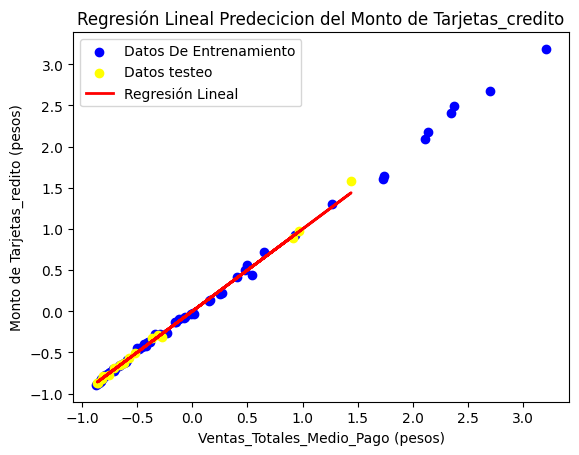

In [ ]:
# Visualizamos los resultados de la regresión lineal
plt.scatter(X_train, y_train, color='blue', label='Datos De Entrenamiento')  # Grafico entrenamiento
plt.scatter(X_test, y_test, color='yellow', label='Datos testeo')  # Grafico testeo
plt.plot(X_test,y_pred , color='red', linewidth=2, label='Regresión Lineal')  # Grafico la prediccion

plt.xlabel('Ventas_Totales_Medio_Pago (pesos)')  # Etiqueta del eje X
plt.ylabel('Monto de Tarjetas_redito (pesos)')  # Etiqueta del eje Y
plt.legend()  # Mostrar la leyenda
plt.title('Regresión Lineal Predecicion del Monto de Tarjetas_credito')  # Título del gráfico

plt.show()

**El Grafico Muestra ,como los datos ( Y de testeo) estan muy cerca de los (Y predicho ),**  

 ** **esto indica que el modelo que se utilizo es el correcto**  **

##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

In [ ]:

# Matris de confucion no se puede usar ya que nesecita valores
# que indiquen prediccion de clase no valores continuos

# Evaluamos el modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Aplico Error Medio Absoluto
print('Error Medio Absoluto (MAE) :', mean_absolute_error(y1_test, y1_pred).round(4))

# Calculo Error Cuadratico Medio
print('Error Cuadratico Medio (MSE) :', mean_squared_error(y1_test, y1_pred).round(4))

# calculo (RMSE)la Raiz Cuadrada del Error Cuadatico Medio
print('Raiz Cuadrada del Error Cuadatico Medio (RMSE):', mean_squared_error(y1_test, y1_pred, squared=False).round(4))

# Calculo Coeficiente de Determinacion R^2
print('Coeficiente de Determinacion (R^2) :', r2_score(y_test, y_pred).round(4))

Error Medio Absoluto (MAE) : 1029879.327
Error Cuadratico Medio (MSE) : 2929156456354.88
Raiz Cuadrada del Error Cuadatico Medio (RMSE): 1711477.8574
Coeficiente de Determinacion (R^2) : 0.9967


**las metricas(MAE y RMSE) nos dan una idea real del error cometido en las predicciones y el (R^2) Da una indicación de qué tan bueno es el ajuste del modelo**

##6- Sacar una conclusión en función de los resultados, errores, y predicciones.

**El error absoluto medio (MAE) y la Raíz Cuadrada del Error Cuadrático Medio,  medidos en pesos, indican un error de predicción entre (1.000.000 y 1.700.000 pesos) con predicciones que inician entre ( 10.000.000 hasta casi 180.000.000  pesos) y los X de alimentación para el modelo llegan hasta los 480.000.000 de pesos ,es decir los valores reales son muy grandes, por eso el error no parece tan grande . y por otro lado el (R^2) Si se acerca a "1" indica que el modelo explica toda la variabilidad de X, al predecir, debido a que estos datos son desde el (2023/07 , hasta 2017/01) , en este periodo hay una gran variación por la inflación y esto se expresa en la predicción.**

##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler #librerias para estandarizar

# Primero calculamos el metodo del codo para saber K
#Calculamos la métrica SSE Sum of Square Error para diferentes K (suma de errores al cuadrado)
krango=range(1,10)
sse=[]
for k in krango:
  kmeans=KMeans(n_clusters=k).fit(df)
  sse.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(sse)
sse

[1.0374012212228577e+18, 2.4596356383710208e+17, 1.0846668155376362e+17, 6.526281182545324e+16, 4.1359646314868264e+16, 2.8064344662627284e+16, 1.91291961584051e+16, 1.3639454676146776e+16, 1.0506101032788346e+16]


[1.0374012212228577e+18,
 2.4596356383710208e+17,
 1.0846668155376362e+17,
 6.526281182545324e+16,
 4.1359646314868264e+16,
 2.8064344662627284e+16,
 1.91291961584051e+16,
 1.3639454676146776e+16,
 1.0506101032788346e+16]

Text(0.5, 1.0, 'Metodo del Codo')

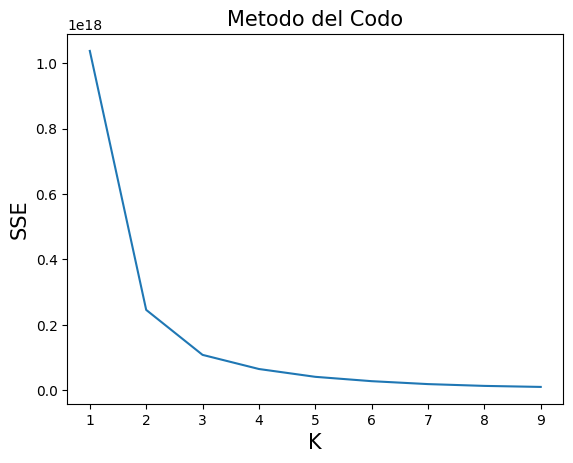

In [ ]:
plt.xlabel('K', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.plot(krango,sse)
plt.title("Metodo del Codo", fontsize=15)

In [ ]:
# Agrupamos y agregamos la columna de grupos (cluster)

escalador = MinMaxScaler().fit(df.values)  #estandariza los datos

#crea el dataframe utilizando objetos de la clase definida arriba
df1 = pd.DataFrame(escalador.transform(df.values),
                       columns=["ventas_totales_medio_pago", "tarjetas_credito"])

 #utilizamos el algoritmo de cluster
kmeans = KMeans(n_clusters=3).fit(df1.values)

#agrega a la base de datos la etiqueta del cluster q pertenece
df1["cluster"] = kmeans.labels_


display(df1)
df1.describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ventas_totales_medio_pago,tarjetas_credito,cluster
0,0.004083,0.004395,1
1,0.000000,0.000000,1
2,0.003910,0.003191,1
3,0.006876,0.006842,1
4,0.004324,0.005429,1
...,...,...,...
75,0.787912,0.809258,0
76,0.794663,0.828903,0
77,0.875483,0.875102,0
78,1.000000,1.000000,0


,ventas_totales_medio_pago,tarjetas_credito,cluster
count,80.000000,80.000000,80.000000
mean,0.199750,0.204601,1.125000
std,0.235377,0.236480,0.603261
min,0.000000,0.000000,0.000000
25%,0.031887,0.036602,1.000000
50%,0.114389,0.125179,1.000000
75%,0.259118,0.257115,1.250000
max,1.000000,1.000000,2.000000


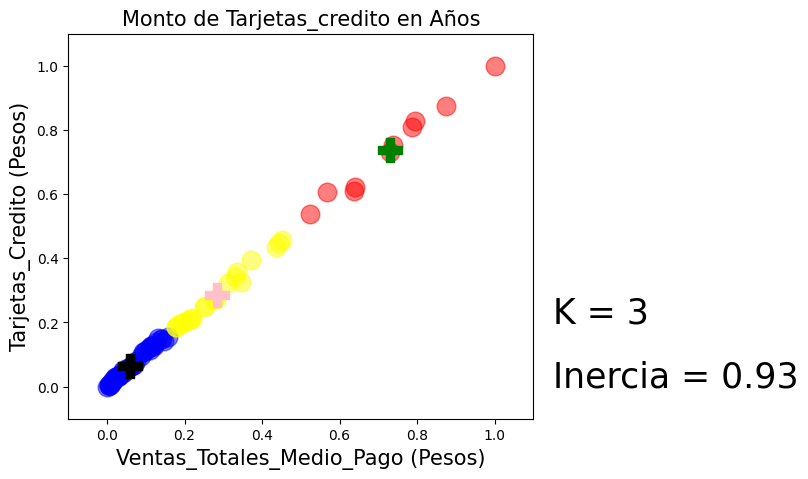

In [ ]:
# Graficamos los clusters y coloreamos los puntos del grupo

plt.figure(figsize=(6, 5), dpi=100)

# colores a utilizar con los centroides
colores1 = ["green", "black", "pink"]

# colores a utilizar con los grupos
colores = ["red", "blue", "yellow"]

for cluster in range(kmeans.n_clusters):

    plt.scatter(df1[df1["cluster"] == cluster]["ventas_totales_medio_pago"],
                df1[df1["cluster"] == cluster]["tarjetas_credito"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)

    plt.scatter(kmeans.cluster_centers_[cluster][0],
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores1[cluster])

plt.title("Monto de Tarjetas_credito en Años", fontsize=15)
plt.xlabel("Ventas_Totales_Medio_Pago (Pesos)", fontsize=15)
plt.ylabel("Tarjetas_Credito (Pesos)", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()



**Hay una relación en la agrupación, que tiene como base la inflación**

##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

**Para generar una idea mas acabada, sobre como la variables (ventas_totales_medio_pago, tarjetas_credito ) debería poder compararse con (pago en efectivo , pago con debito), ya que al aumentar tanto el consumo por inflación, se debería notar una relación donde proporcionalmente disminuye el pago en efectivo y sube en porcentaje el pago con debito o crédito , debido a que uno no tiene tanto dinero en efectivo**